In [1]:
# !pip install nltk==3.5
# !pip install colorama==0.4.3
# !pip install numpy==1.18.5
# !pip install scikit_learn==0.23.2
# !pip install Flask==1.1.2
#https://towardsdatascience.com/how-to-build-your-own-chatbot-using-deep-learning-bb41f970e281

In [3]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model


In [5]:


# Check the GPU available
print(tf.config.list_physical_devices())
print("is_built_with_cuda:",tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
is_built_with_cuda: True


In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Loading Json file 

In [8]:
with open('intent.json') as file:
 data=json.load(file)

In [9]:
training_sentences=[]
training_labels=[]
labels=[]
responses=[]
for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])     
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
        
num_classes=len(labels)        
    
    
training_sentences   
responses
labels

['greeting',
 'goodbye',
 'thanks',
 'about',
 'name',
 'help',
 'createaccount',
 'complaint']

In [10]:
lbl_encoder=LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels=lbl_encoder.transform(training_labels)
print(training_labels)

[4 4 4 4 4 3 3 3 7 7 7 7 0 0 0 6 6 6 5 5 5 5 5 5 5 2 2 2 2 2 1 1 1]


In [11]:

vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [12]:
model = Sequential()
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/#:~:text=The%20output%20of%20the%20Embedding,vector%20using%20the%20Flatten%20layer.
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________


In [13]:
    
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='sequential_model.png', show_shapes=True, show_dtype=False,
        show_layer_names=True, rankdir='TB', expand_nested=True, dpi=80 )

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:

# epochs = 500
# history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)
#  train our model
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels),  validation_split=0.25, epochs=epochs, batch_size=16, verbose=1)

Epoch 1/500
2/2 [==============================] - 5s 204ms/step - loss: 2.0649 - accuracy: 0.2083 - val_loss: 2.1109 - val_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 2.0574 - accuracy: 0.2083 - val_loss: 2.1227 - val_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 41ms/step - loss: 2.0508 - accuracy: 0.2083 - val_loss: 2.1346 - val_accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 2.0432 - accuracy: 0.2083 - val_loss: 2.1474 - val_accuracy: 0.0000e+00
Epoch 5/500
2/2 [==============================] - 0s 41ms/step - loss: 2.0359 - accuracy: 0.2083 - val_loss: 2.1606 - val_accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 36ms/step - loss: 2.0288 - accuracy: 0.2083 - val_loss: 2.1739 - val_accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 40ms/step - loss: 2.0220 - accuracy: 0.2083 - val_loss: 2.1879 - val_accuracy: 0.

Epoch 58/500
2/2 [==============================] - 0s 28ms/step - loss: 1.7541 - accuracy: 0.4583 - val_loss: 3.6073 - val_accuracy: 0.1111
Epoch 59/500
2/2 [==============================] - 0s 25ms/step - loss: 1.7518 - accuracy: 0.4583 - val_loss: 3.6288 - val_accuracy: 0.1111
Epoch 60/500
2/2 [==============================] - 0s 26ms/step - loss: 1.7492 - accuracy: 0.4583 - val_loss: 3.6529 - val_accuracy: 0.1111
Epoch 61/500
2/2 [==============================] - 0s 24ms/step - loss: 1.7467 - accuracy: 0.4583 - val_loss: 3.6776 - val_accuracy: 0.1111
Epoch 62/500
2/2 [==============================] - 0s 25ms/step - loss: 1.7445 - accuracy: 0.4583 - val_loss: 3.7040 - val_accuracy: 0.1111
Epoch 63/500
2/2 [==============================] - 0s 25ms/step - loss: 1.7418 - accuracy: 0.4583 - val_loss: 3.7297 - val_accuracy: 0.1111
Epoch 64/500
2/2 [==============================] - 0s 27ms/step - loss: 1.7392 - accuracy: 0.4583 - val_loss: 3.7558 - val_accuracy: 0.1111
Epoch 65/500


Epoch 116/500
2/2 [==============================] - 0s 91ms/step - loss: 1.5431 - accuracy: 0.4583 - val_loss: 4.7394 - val_accuracy: 0.1111
Epoch 117/500
2/2 [==============================] - 0s 20ms/step - loss: 1.5369 - accuracy: 0.4583 - val_loss: 4.7583 - val_accuracy: 0.1111
Epoch 118/500
2/2 [==============================] - 0s 19ms/step - loss: 1.5302 - accuracy: 0.4583 - val_loss: 4.7826 - val_accuracy: 0.1111
Epoch 119/500
2/2 [==============================] - 0s 20ms/step - loss: 1.5239 - accuracy: 0.4583 - val_loss: 4.8075 - val_accuracy: 0.1111
Epoch 120/500
2/2 [==============================] - 0s 19ms/step - loss: 1.5176 - accuracy: 0.4583 - val_loss: 4.8314 - val_accuracy: 0.1111
Epoch 121/500
2/2 [==============================] - 0s 20ms/step - loss: 1.5114 - accuracy: 0.4583 - val_loss: 4.8589 - val_accuracy: 0.1111
Epoch 122/500
2/2 [==============================] - 0s 20ms/step - loss: 1.5067 - accuracy: 0.4583 - val_loss: 4.8884 - val_accuracy: 0.1111
Epoch 

Epoch 174/500
2/2 [==============================] - 0s 23ms/step - loss: 1.1528 - accuracy: 0.5000 - val_loss: 6.4066 - val_accuracy: 0.1111
Epoch 175/500
2/2 [==============================] - 0s 21ms/step - loss: 1.1463 - accuracy: 0.5000 - val_loss: 6.4298 - val_accuracy: 0.1111
Epoch 176/500
2/2 [==============================] - 0s 22ms/step - loss: 1.1411 - accuracy: 0.5417 - val_loss: 6.4573 - val_accuracy: 0.1111
Epoch 177/500
2/2 [==============================] - 0s 21ms/step - loss: 1.1353 - accuracy: 0.5417 - val_loss: 6.4905 - val_accuracy: 0.1111
Epoch 178/500
2/2 [==============================] - 0s 21ms/step - loss: 1.1296 - accuracy: 0.5417 - val_loss: 6.5341 - val_accuracy: 0.1111
Epoch 179/500
2/2 [==============================] - 0s 22ms/step - loss: 1.1236 - accuracy: 0.5417 - val_loss: 6.5768 - val_accuracy: 0.1111
Epoch 180/500
2/2 [==============================] - 0s 27ms/step - loss: 1.1180 - accuracy: 0.5417 - val_loss: 6.6192 - val_accuracy: 0.1111
Epoch 

Epoch 232/500
2/2 [==============================] - 0s 24ms/step - loss: 0.8331 - accuracy: 0.7500 - val_loss: 8.6327 - val_accuracy: 0.1111
Epoch 233/500
2/2 [==============================] - 0s 38ms/step - loss: 0.8269 - accuracy: 0.7500 - val_loss: 8.6834 - val_accuracy: 0.1111
Epoch 234/500
2/2 [==============================] - 0s 35ms/step - loss: 0.8215 - accuracy: 0.7500 - val_loss: 8.7373 - val_accuracy: 0.1111
Epoch 235/500
2/2 [==============================] - 0s 38ms/step - loss: 0.8155 - accuracy: 0.7500 - val_loss: 8.7982 - val_accuracy: 0.1111
Epoch 236/500
2/2 [==============================] - 0s 37ms/step - loss: 0.8097 - accuracy: 0.7917 - val_loss: 8.8394 - val_accuracy: 0.1111
Epoch 237/500
2/2 [==============================] - 0s 23ms/step - loss: 0.8039 - accuracy: 0.7917 - val_loss: 8.8632 - val_accuracy: 0.1111
Epoch 238/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7974 - accuracy: 0.7917 - val_loss: 8.8979 - val_accuracy: 0.1111
Epoch 

2/2 [==============================] - 0s 24ms/step - loss: 0.4913 - accuracy: 1.0000 - val_loss: 11.7112 - val_accuracy: 0.1111
Epoch 290/500
2/2 [==============================] - 0s 22ms/step - loss: 0.4868 - accuracy: 1.0000 - val_loss: 11.7673 - val_accuracy: 0.1111
Epoch 291/500
2/2 [==============================] - 0s 22ms/step - loss: 0.4806 - accuracy: 1.0000 - val_loss: 11.8454 - val_accuracy: 0.1111
Epoch 292/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4750 - accuracy: 1.0000 - val_loss: 11.9209 - val_accuracy: 0.1111
Epoch 293/500
2/2 [==============================] - 0s 23ms/step - loss: 0.4695 - accuracy: 1.0000 - val_loss: 12.0017 - val_accuracy: 0.1111
Epoch 294/500
2/2 [==============================] - 0s 22ms/step - loss: 0.4648 - accuracy: 1.0000 - val_loss: 12.0669 - val_accuracy: 0.1111
Epoch 295/500
2/2 [==============================] - 0s 23ms/step - loss: 0.4592 - accuracy: 1.0000 - val_loss: 12.0944 - val_accuracy: 0.1111
Epoch 296/500

2/2 [==============================] - 0s 25ms/step - loss: 0.2348 - accuracy: 1.0000 - val_loss: 14.7761 - val_accuracy: 0.1111
Epoch 347/500
2/2 [==============================] - 0s 23ms/step - loss: 0.2317 - accuracy: 1.0000 - val_loss: 14.8134 - val_accuracy: 0.1111
Epoch 348/500
2/2 [==============================] - 0s 23ms/step - loss: 0.2283 - accuracy: 1.0000 - val_loss: 14.8623 - val_accuracy: 0.1111
Epoch 349/500
2/2 [==============================] - 0s 24ms/step - loss: 0.2254 - accuracy: 1.0000 - val_loss: 14.9225 - val_accuracy: 0.1111
Epoch 350/500
2/2 [==============================] - 0s 23ms/step - loss: 0.2220 - accuracy: 1.0000 - val_loss: 14.9915 - val_accuracy: 0.1111
Epoch 351/500
2/2 [==============================] - 0s 22ms/step - loss: 0.2190 - accuracy: 1.0000 - val_loss: 15.0617 - val_accuracy: 0.1111
Epoch 352/500
2/2 [==============================] - 0s 23ms/step - loss: 0.2162 - accuracy: 1.0000 - val_loss: 15.1147 - val_accuracy: 0.1111
Epoch 353/500

2/2 [==============================] - 0s 33ms/step - loss: 0.1080 - accuracy: 1.0000 - val_loss: 17.1815 - val_accuracy: 0.1111
Epoch 404/500
2/2 [==============================] - 0s 24ms/step - loss: 0.1068 - accuracy: 1.0000 - val_loss: 17.2197 - val_accuracy: 0.1111
Epoch 405/500
2/2 [==============================] - 0s 22ms/step - loss: 0.1051 - accuracy: 1.0000 - val_loss: 17.2419 - val_accuracy: 0.1111
Epoch 406/500
2/2 [==============================] - 0s 24ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 17.2641 - val_accuracy: 0.1111
Epoch 407/500
2/2 [==============================] - 0s 23ms/step - loss: 0.1028 - accuracy: 1.0000 - val_loss: 17.2853 - val_accuracy: 0.1111
Epoch 408/500
2/2 [==============================] - 0s 24ms/step - loss: 0.1015 - accuracy: 1.0000 - val_loss: 17.3169 - val_accuracy: 0.1111
Epoch 409/500
2/2 [==============================] - 0s 22ms/step - loss: 0.1000 - accuracy: 1.0000 - val_loss: 17.3698 - val_accuracy: 0.1111
Epoch 410/500

2/2 [==============================] - 0s 25ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 18.8746 - val_accuracy: 0.1111
Epoch 461/500
2/2 [==============================] - 0s 24ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 18.8911 - val_accuracy: 0.1111
Epoch 462/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 18.9057 - val_accuracy: 0.1111
Epoch 463/500
2/2 [==============================] - 0s 27ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 18.9136 - val_accuracy: 0.1111
Epoch 464/500
2/2 [==============================] - 0s 43ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 18.9220 - val_accuracy: 0.1111
Epoch 465/500
2/2 [==============================] - 0s 35ms/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 18.9441 - val_accuracy: 0.1111
Epoch 466/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 18.9811 - val_accuracy: 0.1111
Epoch 467/500

In [15]:
# Explore History details
print(history.params)
print(history.history.keys())
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ',history.history['accuracy'][-1])

{'verbose': 1, 'epochs': 500, 'steps': 2}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Final training loss 	 0.03709938004612923
Final training accuracy  1.0


### Pickle can be used to serialize Python object structures, which refers to the process of converting an object in the memory to a byte stream that can be stored as a binary file on disk. When we load it back to a Python program, this binary file can be de-serialized back to a Python object.

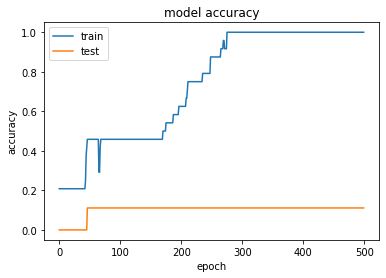

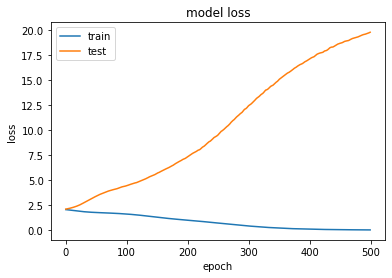

KeyError: 'sparse_categorical_crossentropy'

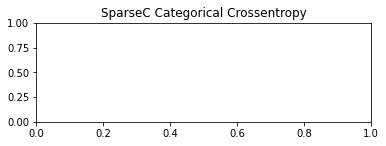

In [16]:
!pip install matplotlib
import matplotlib.pyplot as pyplot
# summarize history for accuracy
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.savefig('intent_accuracy.png')
pyplot.show()


# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.savefig('intent_loss.png')
pyplot.show()

# plot mse during training
pyplot.subplot(212)
pyplot.title('SparseC Categorical Crossentropy')
pyplot.plot(history.history['sparse_categorical_crossentropy'], label='train')
# pyplot.plot(history.history['val_sparse_categorical_crossentropy'], label='test')
pyplot.legend()
pyplot.savefig('intent_mse.png')
pyplot.show()

In [ ]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intent.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)
        print (lbl_encoder)
    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        #print(CLASSES[np.argmax(result)])
        print([np.argmax(result)])
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        print("****************")
        print(tag)
#         print(data['intents'])
        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
LabelEncoder()
User: quit


In [ ]:
hello

